# Aluno

Rosinaldo Guedes

# Dependências

In [56]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo e métricas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
file_name = "Salary_dataset.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "abhishek14398/salary-dataset-simple-linear-regression",
  file_name,
)

df.head()

/tmp/ipython-input-3129862039.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [58]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [59]:
# Estatísticas descritivas
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [60]:
# Verificar se há valores ausentes
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


# Relação entre anos de experiência e salário

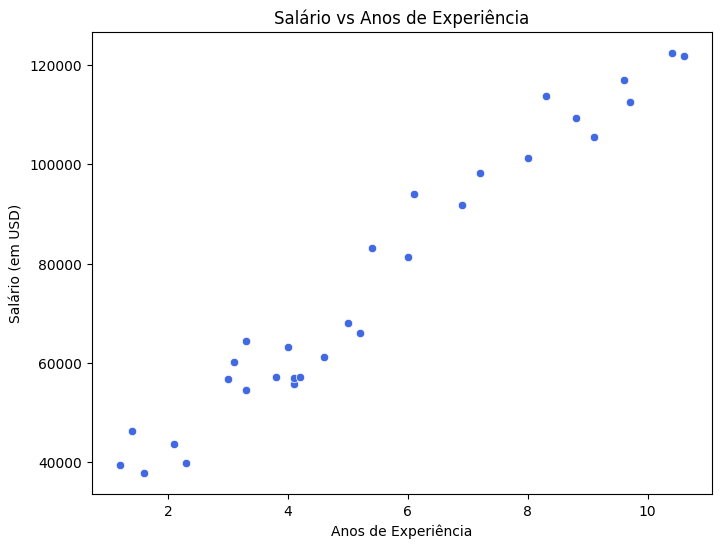

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="YearsExperience", y="Salary", data=df, color="royalblue")
plt.title("Salário vs Anos de Experiência")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário (em USD)")
plt.show()

# Definição dos dataframes de treino e teste

In [62]:
# Variável independente (X) e dependente (y)
X = df[['YearsExperience']]
y = df['Salary']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 12 to 6
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes


In [64]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 27 to 24
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  8 non-null      float64
dtypes: float64(1)
memory usage: 128.0 bytes


In [65]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 22 entries, 12 to 6
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes


In [66]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 8 entries, 27 to 24
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 128.0 bytes


# Treino

In [67]:
# Instanciando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predições
y_pred = modelo.predict(X_test)

# Métricas de avaliação
print("MAE (Erro Absoluto Médio): ", mean_absolute_error(y_test, y_pred))
print("MSE (Erro Quadrático Médio): ", mean_squared_error(y_test, y_pred))
print("RMSE (Raiz do Erro Quadrático Médio): ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² (Coeficiente de Determinação): ", r2_score(y_test, y_pred))

MAE (Erro Absoluto Médio):  5056.995466663583
MSE (Erro Quadrático Médio):  38802588.99247057
RMSE (Raiz do Erro Quadrático Médio):  6229.172416338351
R² (Coeficiente de Determinação):  0.9347210011126783


O modelo apresenta excelente desempenho, explicando cerca de 93% da variação dos salários (R² ≈ 0.93).
O erro médio absoluto de aproximadamente $5.000 indica boa precisão nas previsões.
Em geral, a regressão linear se ajusta bem à relação entre experiência e salário.

# Visualizar a reta de regressão

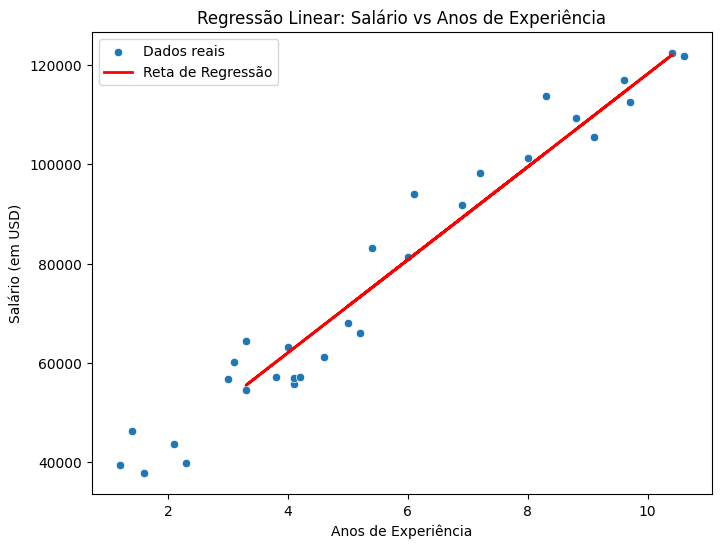

In [69]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="YearsExperience", y="Salary", data=df, label="Dados reais")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Reta de Regressão")
plt.title("Regressão Linear: Salário vs Anos de Experiência")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário (em USD)")
plt.legend()
plt.show()

# Testando previsões para 1 a 30 anos de experiência

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


    Anos de Experiência  Salário Previsto (USD)
0                     1            33913.041908
1                     2            43284.057987
2                     3            52655.074067
3                     4            62026.090147
4                     5            71397.106227
5                     6            80768.122306
6                     7            90139.138386
7                     8            99510.154466
8                     9           108881.170545
9                    10           118252.186625
10                   11           127623.202705
11                   12           136994.218784
12                   13           146365.234864
13                   14           155736.250944
14                   15           165107.267023
15                   16           174478.283103
16                   17           183849.299183
17                   18           193220.315263
18                   19           202591.331342
19                   20           211962

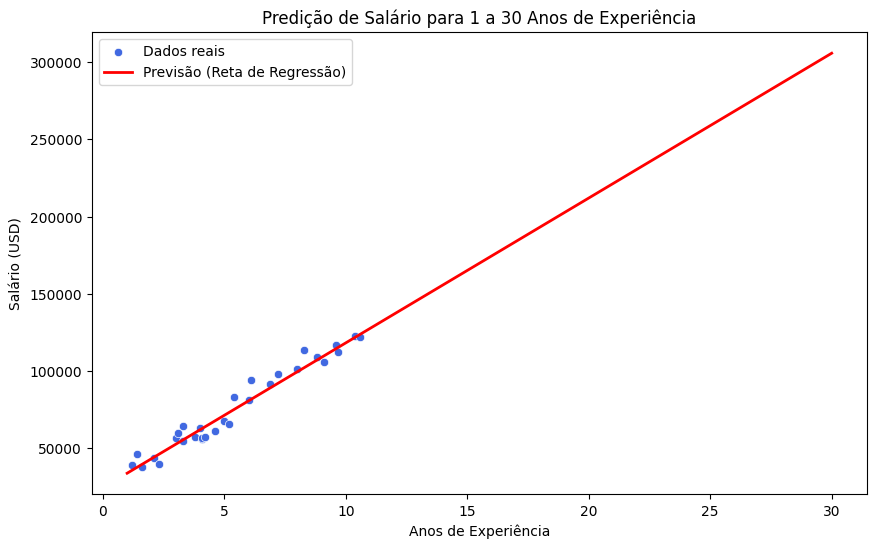

In [70]:
anos_experiencia = np.arange(1, 31).reshape(-1, 1)
salarios_previstos = modelo.predict(anos_experiencia)

# Criando um DataFrame com os resultados
df_pred = pd.DataFrame({
    "Anos de Experiência": anos_experiencia.flatten(),
    "Salário Previsto (USD)": salarios_previstos
})

# Exibir as primeiras previsões
print(df_pred.head(30))

# Plotar o gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(x="YearsExperience", y="Salary", data=df, label="Dados reais", color="royalblue")
plt.plot(df_pred["Anos de Experiência"], df_pred["Salário Previsto (USD)"], color="red", linewidth=2, label="Previsão (Reta de Regressão)")
plt.title("Predição de Salário para 1 a 30 Anos de Experiência")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário (USD)")
plt.legend()
plt.show()